<a href="https://colab.research.google.com/github/roshnik1610/machine-learning-projects/blob/main/Netflix_stock_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/NFLX.csv')

In [3]:

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
#problem Statment - https://drive.google.com/file/d/1vmYHsN0ouOfKiXbVrNY17dH0ypQ5E6Gd/view?usp=sharing

In [6]:
df.drop(columns=["Open","High","Low","Close","Volume"], inplace= True)

In [7]:
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Adj Close  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [10]:
df.set_index("Date", inplace= True)

In [11]:
df

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


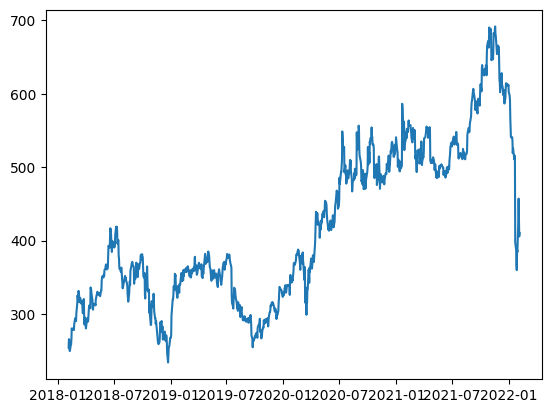

In [12]:
plt.plot(df['Adj Close'])
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

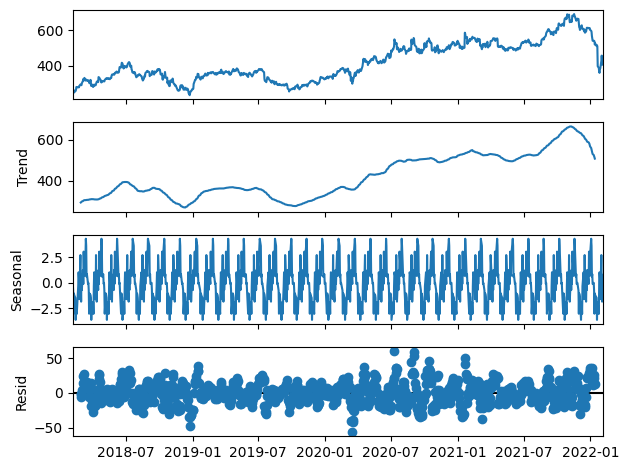

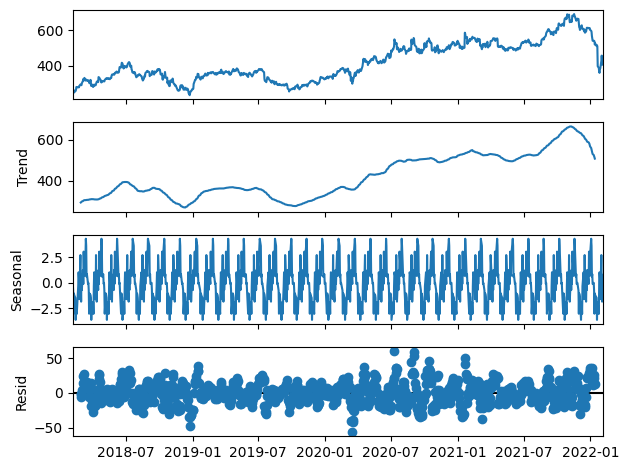

In [14]:
decompose= seasonal_decompose(df, period=30)
decompose.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
resule= adfuller(df)

In [17]:
if(resule[1]>0.05):
  print("it is not stationary")
else:
  print("it is stationary")

it is not stationary


In [18]:
new_data = df-df.shift(1)  # By removing trend and pattern we will be achieving stationarity
new_data= new_data.dropna()
new_data.head()

,Adj Close
Date,
2018-02-06,11.460006
2018-02-07,-1.160003
2018-02-08,-14.459992
2018-02-09,-0.630005
2018-02-12,8.480011


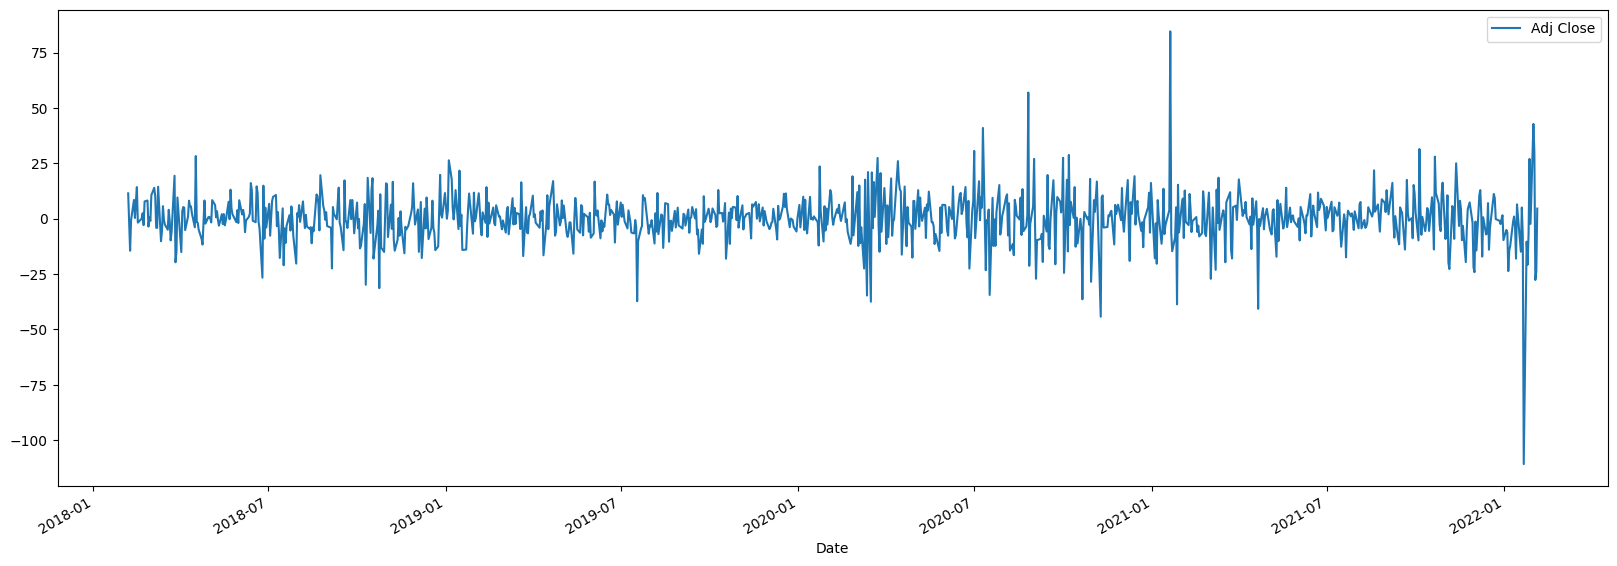

In [19]:
new_data.plot(figsize=(20,7))  #First method to check is - Draw the line plot
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(new_data)
result[1]

np.float64(1.5304022754298515e-26)

In [21]:
if result[1] >= 0.05:
  print("This data is not stationary")
else:
  print("This data is stationary")

This data is stationary


Figure(640x480)


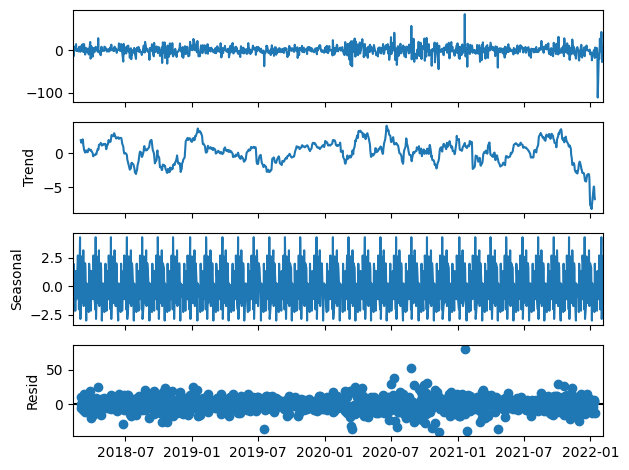

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result =seasonal_decompose(new_data, period =30 )
print(result.plot())

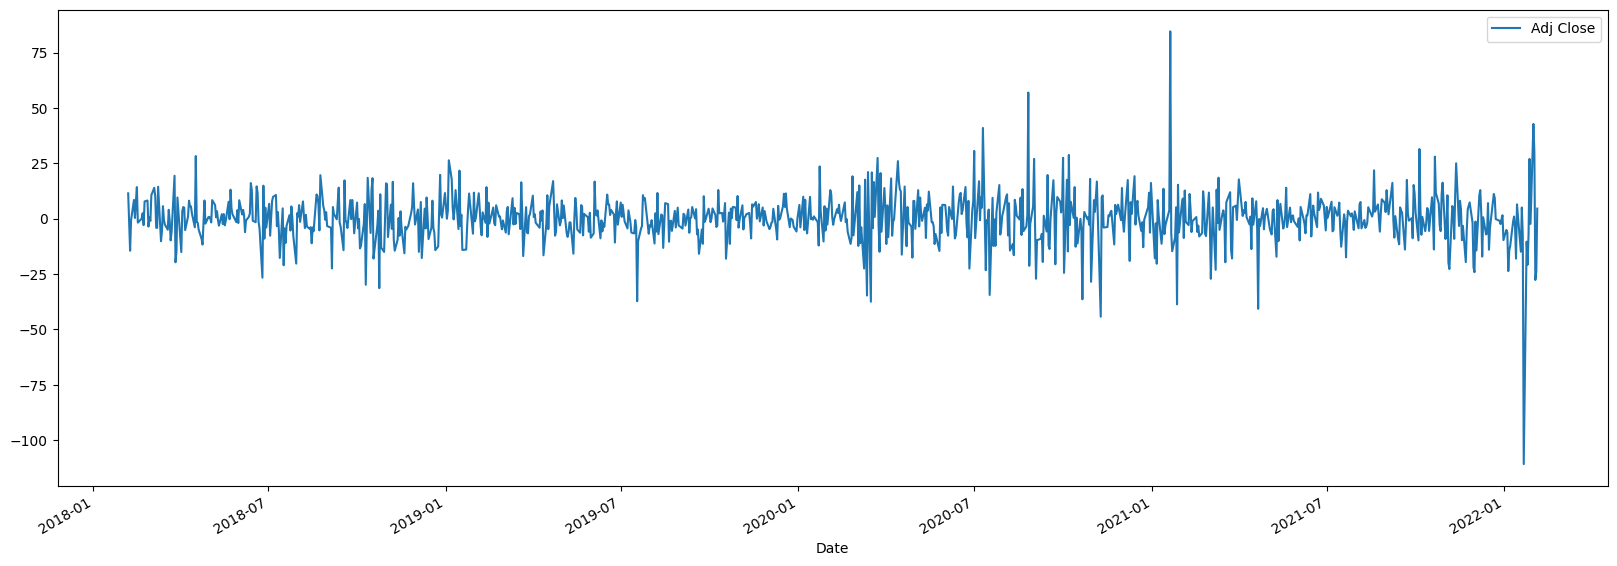

In [23]:
# Graph of STATIONARY data
new_data.plot(figsize=(20,7))
plt.show()

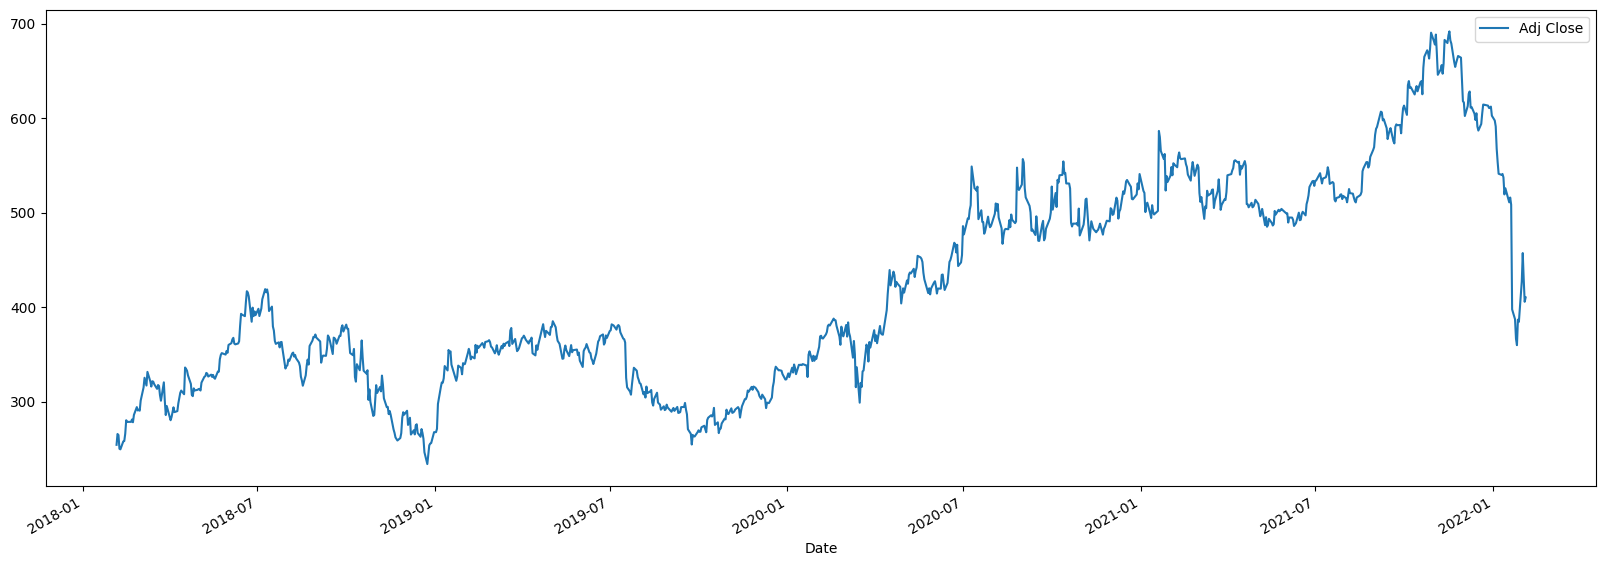

In [24]:
# Graph of NON-STATIONARY data
df.plot(figsize=(20,7))
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
import itertools
from sklearn.metrics import mean_squared_error

trainsize = int(len(new_data)*0.8)  # Selecting 80percent of full data for training
trainsize

806

In [27]:
train=new_data["Adj Close"][: trainsize] # Out of 1007 i will use 806 for training
test=new_data["Adj Close"][trainsize : ] # i will use remaining 201 rows for testing

p=range(0,10) # Past values ( autoregression )
d=range(1,2) # Differencing
q=range(0,10) # Past errors ( Moving average )

# Create a combination of different different value of p,d,q, that you can try in your model
pdq = list(itertools.product(p,d,q))

pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 1, 9),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (2, 1, 9),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (3, 1, 9),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (4, 1, 8),
 (4, 1, 9),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (5, 1, 8),
 (5, 1, 9),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (6, 1, 8),
 (6, 1, 9),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7),
 (7, 1, 8),
 (7, 1, 9),
 (8, 1, 0),
 (8, 1, 1),
 (8, 1, 2),
 (8,

In [28]:
rmse=[]  # to store the rmse score of different different value of pdq whichever pdq gives best score consier ti as final value
order1=[]

for i in pdq:
  model = ARIMA(train, order =i)
  model_fit = model.fit()
  pred = model_fit.predict(start = len(train)  , end = len(train) + len(test)-1)
  error = np.sqrt(mean_squared_error(test , pred))  # compare actual value vs predicted value

  # Add the score in the list so later on we can compare all score of all pdq values
  order1.append(i)
  rmse.append(error)

# store the result in a dataframe to compare them
result = pd.DataFrame(index = order1 , data = rmse , columns=["RMSE score"])
result

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,RMSE score
"(0, 1, 0)",13.691384
"(0, 1, 1)",13.080568
"(0, 1, 2)",13.088711
"(0, 1, 3)",13.090931
"(0, 1, 4)",13.090909
...,...
"(9, 1, 5)",13.130211
"(9, 1, 6)",13.119117
"(9, 1, 7)",13.104128
"(9, 1, 8)",13.172165


In [39]:
result.sort_values(by="RMSE score")

,RMSE score
"(6, 1, 9)",13.065957
"(2, 1, 0)",13.078336
"(0, 1, 1)",13.080568
"(4, 1, 4)",13.082721
"(3, 1, 8)",13.085985
...,...
"(6, 1, 5)",13.246801
"(3, 1, 9)",13.254423
"(5, 1, 8)",13.395929
"(4, 1, 8)",13.396887


In [40]:
# start making predict from inde 806
start = len(train)
start

806

In [41]:
end = len(train) + len(test)-1
end

1007

In [47]:
model1 = ARIMA(new_data["Adj Close"], order =(6,1,9))
result1 = model1.fit()
result1.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1008
Model:                 ARIMA(6, 1, 9)   Log Likelihood               -3839.886
Date:                Sun, 08 Feb 2026   AIC                           7711.771
Time:                        03:51:34   BIC                           7790.407
Sample:                             0   HQIC                          7741.648
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1120      0.410     -2.713      0.007      -1.915      -0.309
ar.L2         -1.1527      0.657     -1.756      0.079      -2.439       0.134
ar.L3         -0.9019      0.781     -1.154      0.248      -2.433       0.629
ar.L4         -0.4640      0.753     -0.616      0.538      -1.940       1.012
ar.L5         -0.1500      0.579     -0.259      0.796      -1.285       0.985
ar.L6          0.4312      0.365      1.181      0.238      -0.284       1.147
ma.L1          0.0660      0.396      0.167      0.867      -0.710       0.842
ma.L2          0.0681      0.221      0.309      0.757      -0.364       0.500
ma.L3         -0.2398      0.116     -2.066      0.039      -0.467      -0.012
ma.L4         -0.4117      0.062     -6.631      0.000      -0.533      -0.290
ma.L5         -0.3749      0.172     -2.184      0.029      -0.711      -0.038
ma.L6         -0.6199      0.230     -2.698      0.007      -1.070      -0.170
ma.L7          0.4564      0.371      1.231      0.218      -0.270       1.183
ma.L8         -0.0244      0.034     -0.721      0.471      -0.091       0.042
ma.L9          0.0817      0.036      2.280      0.023       0.011       0.152
sigma2       119.3903      3.571     33.434      0.000     112.391     126.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9958.03
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
df["Prediction_by_ARIMA"] = result1.predict( start = 1 , end = 1007)

In [54]:
df["Prediction_by_ARIMA"].isna().sum()

np.int64(2)

In [55]:
df["Prediction_by_ARIMA"].isna().sum()

np.int64(2)

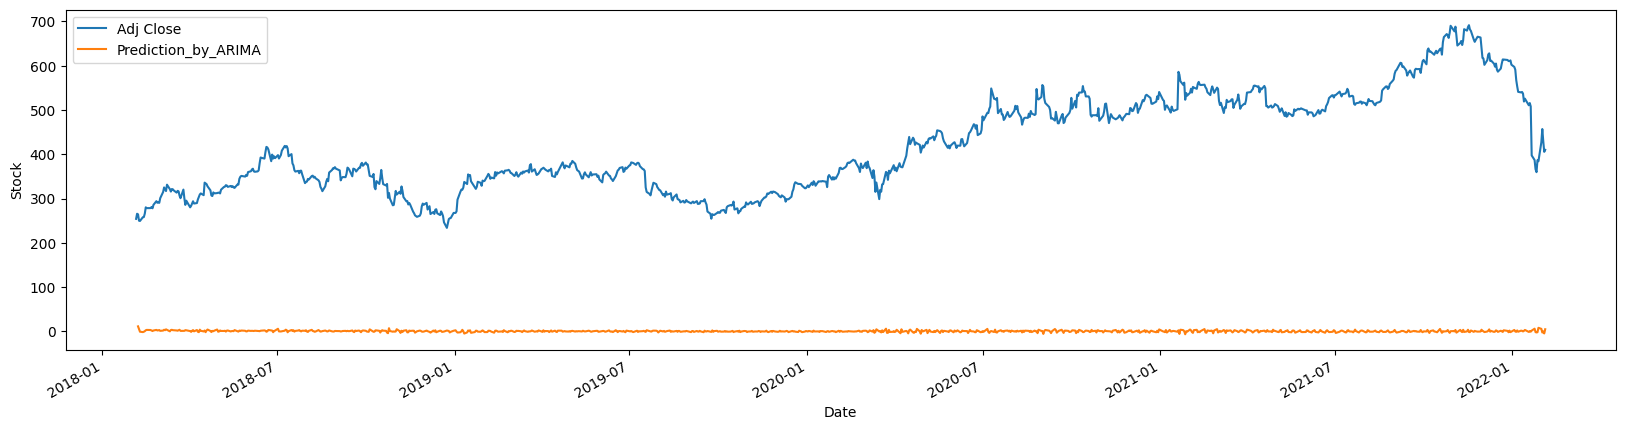

In [56]:
df[["Adj Close" , "Prediction_by_ARIMA"]].plot(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Stock")
plt.show()

In [57]:
forecast = result1.get_forecast(steps=30)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
forecast_value = forecast.predicted_mean
forecast_value

,predicted_mean
1008,3.399666
1009,-8.340171
1010,-0.445053
1011,4.275740
1012,0.154859
1013,4.807995
1014,-4.236332
1015,-5.830616
1016,6.748824
1017,3.249973


In [59]:
forecast = result1.get_forecast(steps=365)
forecast_value = forecast.predicted_mean
forecast_value

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
1008,3.399666
1009,-8.340171
1010,-0.445053
1011,4.275740
1012,0.154859
...,...
1368,0.116246
1369,0.169803
1370,0.117024
1371,0.169511
